In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\desertation\IRSE_FIRE_2022_Track_Test_Data_1000.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Comments                  1001 non-null   object
 1   Surrounding Code Context  1001 non-null   object
 2   Class                     1001 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [4]:
data.head()

,Comments,Surrounding Code Context,Class
0,/*READ_INT_FUNCTIONS*/,-5. if (png_ptr != NULL)\n-4. png_war...,Not Useful
1,/*Put the chunk name into png_ptr->chunk_name.*/,"-2. png_read_data(png_ptr, buf, 8);\n-1. ...",Not Useful
2,/*critical*/,"-8. png_crc_read(png_structrp png_ptr, png_byt...",Not Useful
3,/*READ_iCCP|iTXt|pCAL|sCAL|sPLT|tEXt|zTXt|SEQU...,-9. {\n-8. if (warn != 0)\n-7. ...,Not Useful
4,/*ZLIB_VERNUM >= 0x1240*/,#if ZLIB_VERNUM >= 0x1240\n\n/*ZLIB_VERNUM >= ...,Not Useful


In [5]:
data

,Comments,Surrounding Code Context,Class
0,/*READ_INT_FUNCTIONS*/,-5. if (png_ptr != NULL)\n-4. png_war...,Not Useful
1,/*Put the chunk name into png_ptr->chunk_name.*/,"-2. png_read_data(png_ptr, buf, 8);\n-1. ...",Not Useful
2,/*critical*/,"-8. png_crc_read(png_structrp png_ptr, png_byt...",Not Useful
3,/*READ_iCCP|iTXt|pCAL|sCAL|sPLT|tEXt|zTXt|SEQU...,-9. {\n-8. if (warn != 0)\n-7. ...,Not Useful
4,/*ZLIB_VERNUM >= 0x1240*/,#if ZLIB_VERNUM >= 0x1240\n\n/*ZLIB_VERNUM >= ...,Not Useful
...,...,...,...
996,/*The following document where the background ...,-5. #define PNG_CMAP_NONE 0\n\n /*The fol...,Useful
997,/*Do all the *safe* initialization - 'safe' me...,-1. } png_image_read_control;\n/* Do all the *...,Useful
998,/*And set the rest of the structure to NULL to...,-10. * called from here must *not* call png_m...,Useful
999,"/*Use png_ptr here, not info_ptr, because by e...",-8. static png_uint_32\n-7. png_image_format(p...,Useful


In [6]:
data.isnull().sum()

Comments                    0
Surrounding Code Context    0
Class                       0
dtype: int64

In [7]:
# Get the columns name 
data.columns

Index(['Comments', 'Surrounding Code Context', 'Class'], dtype='object')

In [8]:
print(data.corr())

Empty DataFrame
Columns: []
Index: []


In [9]:
data.columns

Index(['Comments', 'Surrounding Code Context', 'Class'], dtype='object')

In [10]:
data

,Comments,Surrounding Code Context,Class
0,/*READ_INT_FUNCTIONS*/,-5. if (png_ptr != NULL)\n-4. png_war...,Not Useful
1,/*Put the chunk name into png_ptr->chunk_name.*/,"-2. png_read_data(png_ptr, buf, 8);\n-1. ...",Not Useful
2,/*critical*/,"-8. png_crc_read(png_structrp png_ptr, png_byt...",Not Useful
3,/*READ_iCCP|iTXt|pCAL|sCAL|sPLT|tEXt|zTXt|SEQU...,-9. {\n-8. if (warn != 0)\n-7. ...,Not Useful
4,/*ZLIB_VERNUM >= 0x1240*/,#if ZLIB_VERNUM >= 0x1240\n\n/*ZLIB_VERNUM >= ...,Not Useful
...,...,...,...
996,/*The following document where the background ...,-5. #define PNG_CMAP_NONE 0\n\n /*The fol...,Useful
997,/*Do all the *safe* initialization - 'safe' me...,-1. } png_image_read_control;\n/* Do all the *...,Useful
998,/*And set the rest of the structure to NULL to...,-10. * called from here must *not* call png_m...,Useful
999,"/*Use png_ptr here, not info_ptr, because by e...",-8. static png_uint_32\n-7. png_image_format(p...,Useful


In [11]:
# change labels
data_labels = data["Class"].values
data_labels[data_labels == "Useful"] = 0
data_labels[data_labels == "Not Useful"] = 1

In [12]:
data.head()

,Comments,Surrounding Code Context,Class
0,/*READ_INT_FUNCTIONS*/,-5. if (png_ptr != NULL)\n-4. png_war...,1
1,/*Put the chunk name into png_ptr->chunk_name.*/,"-2. png_read_data(png_ptr, buf, 8);\n-1. ...",1
2,/*critical*/,"-8. png_crc_read(png_structrp png_ptr, png_byt...",1
3,/*READ_iCCP|iTXt|pCAL|sCAL|sPLT|tEXt|zTXt|SEQU...,-9. {\n-8. if (warn != 0)\n-7. ...,1
4,/*ZLIB_VERNUM >= 0x1240*/,#if ZLIB_VERNUM >= 0x1240\n\n/*ZLIB_VERNUM >= ...,1


In [13]:
data.tail()

,Comments,Surrounding Code Context,Class
996,/*The following document where the background ...,-5. #define PNG_CMAP_NONE 0\n\n /*The fol...,0
997,/*Do all the *safe* initialization - 'safe' me...,-1. } png_image_read_control;\n/* Do all the *...,0
998,/*And set the rest of the structure to NULL to...,-10. * called from here must *not* call png_m...,0
999,"/*Use png_ptr here, not info_ptr, because by e...",-8. static png_uint_32\n-7. png_image_format(p...,0
1000,/*Is the given gamma significantly different f...,-10. * is unclear.\n-9. */\n-8. els...,0


In [14]:
data

,Comments,Surrounding Code Context,Class
0,/*READ_INT_FUNCTIONS*/,-5. if (png_ptr != NULL)\n-4. png_war...,1
1,/*Put the chunk name into png_ptr->chunk_name.*/,"-2. png_read_data(png_ptr, buf, 8);\n-1. ...",1
2,/*critical*/,"-8. png_crc_read(png_structrp png_ptr, png_byt...",1
3,/*READ_iCCP|iTXt|pCAL|sCAL|sPLT|tEXt|zTXt|SEQU...,-9. {\n-8. if (warn != 0)\n-7. ...,1
4,/*ZLIB_VERNUM >= 0x1240*/,#if ZLIB_VERNUM >= 0x1240\n\n/*ZLIB_VERNUM >= ...,1
...,...,...,...
996,/*The following document where the background ...,-5. #define PNG_CMAP_NONE 0\n\n /*The fol...,0
997,/*Do all the *safe* initialization - 'safe' me...,-1. } png_image_read_control;\n/* Do all the *...,0
998,/*And set the rest of the structure to NULL to...,-10. * called from here must *not* call png_m...,0
999,"/*Use png_ptr here, not info_ptr, because by e...",-8. static png_uint_32\n-7. png_image_format(p...,0


In [15]:
data["Class"].value_counts()

1    719
0    282
Name: Class, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


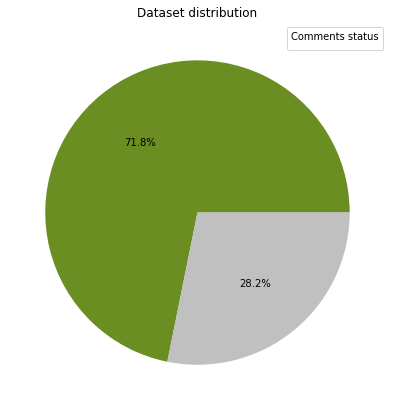

In [16]:
# check if the dataset is balanced
Class = ["Not Useful", "Useful"]
colors = ["olivedrab", "silver"]

plt.figure(figsize=(7,7))
plt.pie(data["Class"].value_counts(), colors=colors, autopct="%1.1f%%")
plt.legend(title = "Comments status")
plt.title("Dataset distribution")
plt.show()

In [17]:
X = data['Comments']
y = data['Class'] 

In [18]:
X.shape

(1001,)

In [19]:
y.shape

(1001,)

In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [21]:
embedded_data = tokenizer.texts_to_sequences(X)

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
# pad to the longest item in the dataset
max_length = max([len(Comments) for Comments  in X])

X = pad_sequences(embedded_data,
                  value=0,
                  padding="post",
                  maxlen=max_length)

In [24]:
X[:5]

array([[  7, 114, 184, ...,   0,   0,   0],
       [568,   1,  20, ...,   0,   0,   0],
       [369,   0,   0, ...,   0,   0,   0],
       [  7, 186, 312, ...,   0,   0,   0],
       [171, 450, 569, ...,   0,   0,   0]])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size = 0.2)


In [26]:
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size = 0.5)


In [27]:
X_train[:5]

array([[384, 162, 231, ...,   0,   0,   0],
       [ 15, 170,   0, ...,   0,   0,   0],
       [442,  11,  17, ...,   0,   0,   0],
       [140,  14, 155, ...,   0,   0,   0],
       [  8,   4, 179, ...,   0,   0,   0]])

In [28]:
X_test[:5]

array([[ 295,    0,    0, ...,    0,    0,    0],
       [   9,    1,   48, ...,    0,    0,    0],
       [ 321,    3, 1072, ...,    0,    0,    0],
       [   1,  202,  285, ...,    0,    0,    0],
       [ 188,    0,    0, ...,    0,    0,    0]])

In [29]:
X_valid[:5]

array([[ 92,   0,   0, ...,   0,   0,   0],
       [ 29,   0,   0, ...,   0,   0,   0],
       [ 10,   1, 409, ...,   0,   0,   0],
       [297,   0,   0, ...,   0,   0,   0],
       [ 74,   0,   0, ...,   0,   0,   0]])

In [30]:
y_valid[:5]

227    1
466    1
860    0
697    1
416    1
Name: Class, dtype: object

In [31]:
y_train[:5]

134    1
245    1
873    0
839    0
359    1
Name: Class, dtype: object

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [33]:
# fixes some errors
y_train = np.array(y_train, dtype=float)
y_valid = np.array(y_valid, dtype=float)
y_test = np.array(y_test, dtype=float)

In [34]:
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [35]:
y_pred = RF_classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        31
         1.0       0.97      0.96      0.96        70

    accuracy                           0.95       101
   macro avg       0.94      0.95      0.94       101
weighted avg       0.95      0.95      0.95       101



In [37]:
#Useful Comment
my_message = ['/*Evaluate first and second derivatives*/']

In [38]:
def preprocess(text):
  text = tokenizer.texts_to_sequences(text)
  text = pad_sequences(text,
                      value=0,
                      padding="post",
                      maxlen=max_length)
  return text

In [39]:
new_message = preprocess(my_message)

In [55]:
output = RF_classifier.predict(new_message)

def prediction(output):
   if output[0] == 1:
     return "Not Useful"
   else:
     return "Useful"

In [56]:
# so wrong
prediction(output)

'Not Useful'

In [57]:
from keras.models import Sequential
from keras.layers import Input, Embedding, LSTM, GlobalMaxPool1D, Dense

In [58]:
INPUT_SHAPE = X_train.shape[1]
VOCABULARY_SIZE = len(tokenizer.word_index)
EMBEDDING_DIMENSION = 20
LSTM_UNITS = 15

In [59]:
rnn = Sequential()

rnn.add(Input(INPUT_SHAPE,))
# +1 here resolves the indexing problem during training
rnn.add(Embedding(VOCABULARY_SIZE+1, EMBEDDING_DIMENSION))

rnn.add(LSTM(LSTM_UNITS, return_sequences=True))

rnn.add(GlobalMaxPool1D())

rnn.add(Dense(units=1, activation="sigmoid"))

In [60]:
rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [61]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1800, 20)          28520     
                                                                 
 lstm_1 (LSTM)               (None, 1800, 15)          2160      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 30,696
Trainable params: 30,696
Non-trainable params: 0
_________________________________________________________________


In [62]:
BATCH_SIZE = 32
EPOCHS = 5

In [63]:
rnn.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid), batch_size=BATCH_SIZE)

Epoch 1/5
25/25 [==============================] - 27s 991ms/step - loss: 0.6676 - accuracy: 0.7163 - val_loss: 0.6139 - val_accuracy: 0.7600
Epoch 2/5
25/25 [==============================] - 24s 960ms/step - loss: 0.6052 - accuracy: 0.7163 - val_loss: 0.5545 - val_accuracy: 0.7600
Epoch 3/5
25/25 [==============================] - 24s 971ms/step - loss: 0.5865 - accuracy: 0.7163 - val_loss: 0.5411 - val_accuracy: 0.7600
Epoch 4/5
25/25 [==============================] - 24s 963ms/step - loss: 0.5604 - accuracy: 0.7163 - val_loss: 0.5192 - val_accuracy: 0.7600
Epoch 5/5
25/25 [==============================] - 24s 948ms/step - loss: 0.4656 - accuracy: 0.7850 - val_loss: 0.3755 - val_accuracy: 0.9400


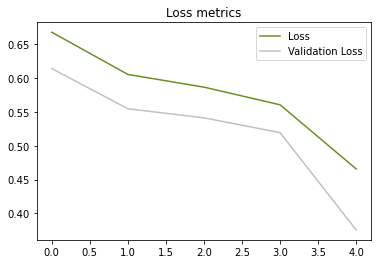

In [64]:
# MODAL EVALUATION
plt.plot(rnn.history.history["loss"], label="Loss", color=colors[0])
plt.plot(rnn.history.history["val_loss"], label="Validation Loss", color=colors[1])
plt.title("Loss metrics")
plt.legend()
plt.show()

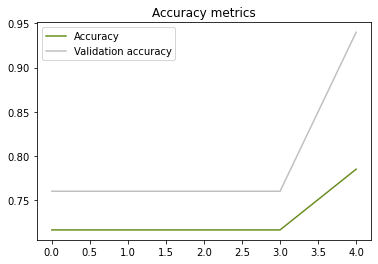

In [65]:
plt.plot(rnn.history.history["accuracy"], label="Accuracy", color=colors[0])
plt.plot(rnn.history.history["val_accuracy"], label="Validation accuracy", color=colors[1])
plt.title("Accuracy metrics")
plt.legend()
plt.show()

In [66]:
rnn.evaluate(X_test, y_test, verbose=1)

4/4 [==============================] - 1s 229ms/step - loss: 0.3805 - accuracy: 0.9406


[0.3804636597633362, 0.9405940771102905]

In [67]:
output = rnn.predict(new_message)

1/1 [==============================] - 0s 435ms/step


In [68]:
def prediction(output):
   if output[0][0] > 0.5:
     return "Not Useful"
   else:
     return "Useful"

In [69]:
prediction(output)

'Useful'